<a href="https://www.kaggle.com/code/iremakdogan/s7l56-building-own-nn-class?scriptVersionId=187762625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
# Import and process the data
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython import display
display.set_matplotlib_formats('svg')

I am following the Deep Learning course of Mike X Cohen on Udemy, Lecture 56 Exercise on creating our of NN class instead of using `nn.Sequential`

🥨 Using `nn.Sequential` is fine, it is simple and straighhtforward BUT it is pretty limiting. You cannot do a lot of customization

🥨 So we need more sophisticated modeling approaches - therefore we need to build our own classes to create DL models

# Create Random Data

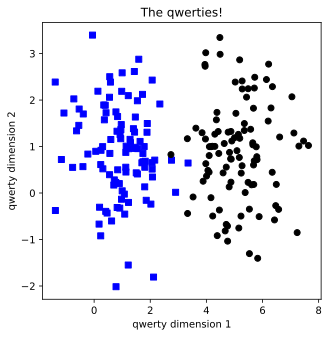

In [2]:
# Create Data
nPerClust = 100
blur = 1

#
A = [ 1,1]
B = [ 5,1]

# generate data
# add some noise to the data with std:blur
# so that there can be a distribution with a center indicated above
a = [ A[0] + np.random.randn(nPerClust)*blur , A[1] + np.random.randn(nPerClust)*blur]
b = [ B[0] + np.random.randn(nPerClust)*blur , B[1] + np.random.randn(nPerClust)*blur]
# concat them into one data matrix
data_np = np.hstack((a,b)).T

# true labels
# transform output labels to number
labels_np = np.vstack(( np.zeros((nPerClust,1)) , np.ones((nPerClust,1))))

# convert to pytorch tensor - probably np library has more functions to construct and reshape data?
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# plot the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[ np.where(labels==0)[0], 0], data[ np.where(labels==0)[0], 1], 'bs')
plt.plot(data[ np.where(labels==1)[0], 0], data[ np.where(labels==1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

# Create the Model

In [3]:
# old method using built-in function:
ANNclassify_OLD = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)

Class Definition:

In [4]:
# New Class Definition
class class4ANN(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    # same with first nn.Linear(2,1)
    self.input = nn.Linear(2,1)

    ### output layer
    self.output = nn.Linear(1,1)

  # forward pass 
  # x is input data to the model
  # pass data thorugh the each layer until the output
  def forward(self,x):

    # pass through the input layer
    x = self.input(x)

    # apply relu activation
    x = F.relu(x) # F is the module in pyTorch stands for Functional

    # output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x

  # same but more compact form
  def forward2(self,x):
    # input layer
    x = F.relu(self.input(x))

    # output layer
    x = torch.sigmoid(self.output(x))

    return x


Define other model features

In [5]:
### create the instance
ANNClassify = class4ANN()

### THE REST IS THE SAME ###
# other model features
learning_rate = .01

# loss function
lossfun = nn.BCELoss()

# optimizer
# SGD: stochasitc gradient
optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learning_rate)

In [6]:
## forward and backward:
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward prop
  yHat = ANNClassify(data)

  # compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

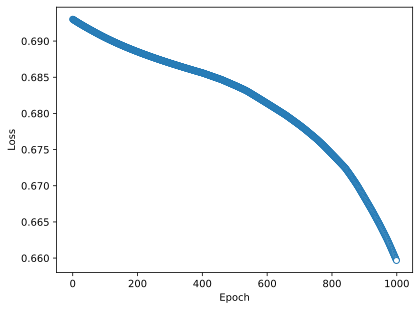

In [7]:
# Plot the losses

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth =.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
# Compute the predictions

# final forward pass
predictions = ANNClassify(data) # obviously for now the training and testing dataset are the same

# find predicted lables to calculate errors
predlabels = predictions>.5 # will be 1, o.w. will be 0
# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy in %
totalacc = 100-100*len(misclassified)/(2*nPerClust) # nPerClust for A + nPerClust for B = 2*nPerClust

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 67.5%


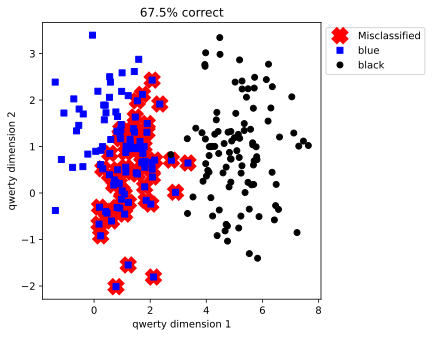

In [9]:
# Plot the labeled data
fig = plt.figure(figsize = (5,5))
plt.plot(data[misclassified,0], data[misclassified,1], 'rx', markersize=12, markeredgewidth = 8)
plt.plot(data[ np.where(labels==0)[0], 0], data[ np.where(labels==0)[0], 1], 'bs')
plt.plot(data[ np.where(labels==1)[0], 0], data[ np.where(labels==1)[0], 1], 'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()